
Result from the remote Quantum Inspire backend:

State	Counts
0 0 0	118
0 1 0	113
1 0 0	250
1 0 1	123
1 1 0	141
1 1 1	279

Result from the local Qiskit simulator backend:

{'1 0 0': 270, '0 1 0': 128, '0 0 0': 134, '1 1 0': 111, '1 1 1': 245, '1 0 1': 136}


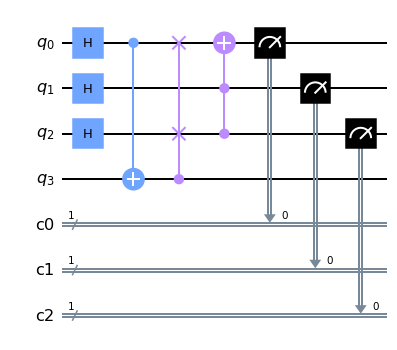

In [1]:
import os
import math 

from getpass import getpass
from coreapi.auth import TokenAuthentication
from qiskit import BasicAer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

QI.set_authentication()
qi_backend = QI.get_backend('QX single-node simulator')

q = QuantumRegister(4, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="uneven dice")

qc.h(q[0:3])

# If q_0 is 1, set q_3 to 1
qc.cnot(q[0], q[3])

# Swap q_0 with q_2 if q_3 is 1
qc.fredkin(q[3], q[0], q[2])

# Not q_0 if q_2 and q_1 were 1 (75% of the shots) 
qc.toffoli(q[1], q[2], q[0])

qc.measure(q[0], c0)
qc.measure(q[1], c1)
qc.measure(q[2], c2)

qi_job = execute(qc, backend=qi_backend, shots=1024)
qi_result = qi_job.result()
histogram = qi_result.get_counts(qc)
print("\nResult from the remote Quantum Inspire backend:\n")
print('State\tCounts')
[print('{0}\t{1}'.format(state, counts)) for state, counts in histogram.items()]

print("\nResult from the local Qiskit simulator backend:\n")
backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots=1024)
result = job.result()
print(result.get_counts(qc))
qc.draw(output="mpl")